In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

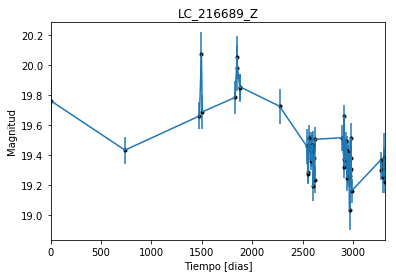

In [2]:
data = np.genfromtxt('LC_216689_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_216689_Z')
plt.savefig("LC_216689_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

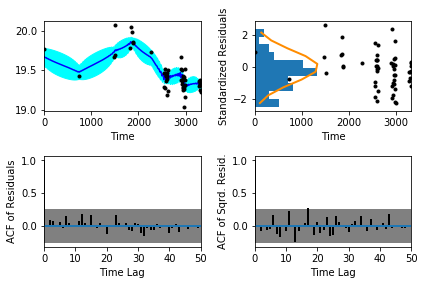

In [5]:
sample.assess_fit()

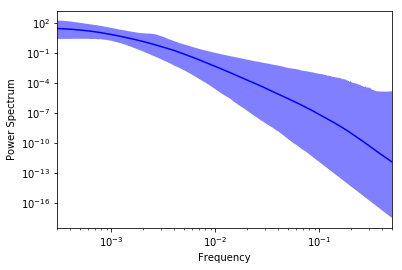

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

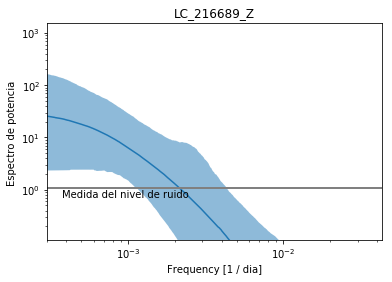

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_216689_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_216689_Z')

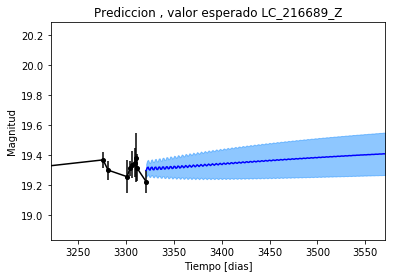

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_216689_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_216689_Z')

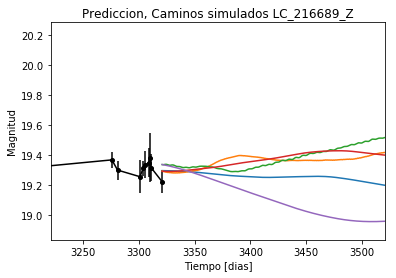

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_216689_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


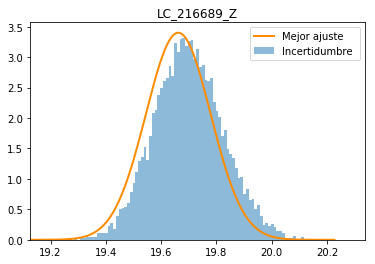

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_216689_Z')
plt.savefig("Mejor_ajuste_LC_216689_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_216689_Z')

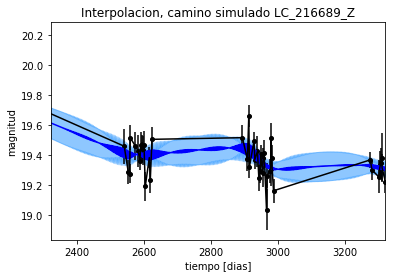

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_216689_Z')

Text(0.5,1,'Interpolacion, camino simulado  LC_216689_Z')

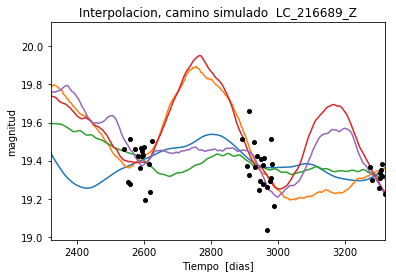

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_216689_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1002.56695644
Median: 0.0078895693204
Standard deviation: 0.191728249272
68% credibility interval: [ 0.00089488  0.15000375]
95% credibility interval: [  3.51419411e-04   7.67698067e-01]
99% credibility interval: [  3.11995404e-04   9.85910210e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 569.965081983
Median: 0.00148509716509
Standard deviation: 0.0852353747474
68% credibility interval: [ 0.00044945  0.01761142]
95% credibility interval: [ 0.00031937  0.24737033]
99% credibility interval: [  3.04800095e-04   6.80088506e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 368.608531214
Median: 0.0107214278783
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1155.09309042
Median: 59.1533509428
Standard deviation: 1.60702398667
68% credibility interval: [ 57.37141651  60.23554055]
95% credibility interval: [ 54.95299874  60.84143993]
99% credibility interval: [ 52.94401591  63.18135072]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 779.852528987
Median: 0.472881803545
Standard deviation: 2.03017718745
68% credibility interval: [ 0.05322438  3.52050807]
95% credibility interval: [ 0.0151277   6.66350598]
99% credibility interval: [ 0.00987063  9.60002095]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1901.09548031
Median: 0.245100454192
Standard deviation: 7.81723720239
68% credibility interval: [ 0.0101386   5.48788857]
95% credibility interval: [  8.92943807e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 785.497351389
Median: 3.22195093099e-31
Standard deviation: 4.24938912241e+66
68% credibility interval: [  2.71153888e-79   2.23409848e-04]
95% credibility interval: [  3.01172108e-114   5.84927931e+021]
99% credibility interval: [  5.71989407e-124   2.59413340e+065]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2854.62380184
Median: 19.5579022529
Standard deviation: 0.129028059999
68% credibility interval: [ 19.45531244  19.66832785]
95% credibility interval: [ 19.2936812   19.82290199]
99% credibility interval: [ 19.1432351   19.97630631]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 454.878718338
Median: 0.00302787285324
Standard deviation: 0.222785933951
68% credibility interval: [ 0.          0.29273625]
95% credibility interval: [ 0.          0.81177431]
99% credibility interval: [ 0.          0.94521903]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 454.878718338
Median: 0.00302787285324
Standard deviation: 0.222785933951
68% credibility interval: [ 0.          0.29273625]
95% credibility interval: [ 0.          0.81177431]
99% credibility interval: [ 0.          0.94521903]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 605.680171483
Median: 0.0
Standard deviation: 0.000566933738581
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1155.09309042
Median: 59.1533509428
Standard deviation: 1.60702398667
68% credibility interval: [ 57.37141651  60.23554055]
95% credibility interval: [ 54.95299874  60.84143993]
99% credibility interval: [ 52.94401591  63.18135072]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2561.52853438
Median: 0.052733360692
Standard deviation: 0.076073955769
68% credibility interval: [ 0.02934216  0.10496753]
95% credibility interval: [ 0.01791737  0.24447715]
99% credibility interval: [ 0.01300166  0.48213966]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2690.04032322
Median: 1.20784854575
Standard deviation: 0.183163137711
68% credibility interval: [ 1.04942603  1.40487507]
95% credibility interval: [ 0.9211854   1.63834611]
99% credibility interval: [ 0.84618338  1.81352895]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1649.20325349
Median: 6.53423744887e-05
Standard deviation: 0.127706799
68% credibility interval: [  9.86621092e-07   3.20309511e-03]
95% credibility interval: [  2.79007113e-26   9.58893113e-02]
99% credibility interval: [  5.38942520e-71   8.10020361e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1002.56695644
Median: (-0.0495716260339-0.165803326748j)
Standard deviation: 1.84680008019
68% credibility interval: [-0.94250137-0.79473268j -0.00562267-0.03286378j]
95% credibility interval: [ -4.82358921e+00+0.j          -2.20803328e-03-0.04209339j]
99% credibility interval: [ -6.19465655e+00+0.j          -1.96032494e-03-0.77641181j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 569.965081983
Median: (-0.00933114068741+0.861757399272j)
Standard deviation: 1.49875559357
68% credibility interval: [-0.11065583+2.11073381j -0.00282396+0.j        ]
95% credibility interval: [-1.55427364+3.74618669j -0.00200663+0.j        ]
99% credibility interval: [ -4.27312211e+00 +6.11875739e+00j  -1.91511548e-03 +1.65030928e-05j]
P